# Experiment Results

In [27]:
import itertools
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from experiment_result import (
    ExperimentResult,
    load_json_file,
    cumsum_to_differences,
    find_arg,
    TEST_TO_VARIABLE_NAME
)

In [28]:
# Show all rows and columns
pd.set_option('display.max_rows', None)

In [61]:
def create_latex_table(df, caption, label):
    latex_table = df.to_latex(
        index=False, caption=caption, label=label, float_format="%.2f", position="h"
    )
    return latex_table

In [29]:
result_dir = Path("results")

In [30]:
# Example of a ExperimentResult object
print(ExperimentResult(load_json_file(result_dir / "main_results_json" / "comve_falcon-7b-chat_100_partition.json")))

Model: tiiuae/falcon-7b-instruct (torch.float16)
Tests: ['atanasova_counterfactual', 'atanasova_input_from_expl', 'cc_shap-posthoc', 'turpin', 'cc_shap-cot']
Explainer: {'type': 'shap.explainers.Partition()', 'max_evaluations': 500})
Examples: 100
Args: Namespace(c_task='comve', model_name='falcon-7b-chat', number_of_samples=100, explainer_type='partition', max_evaluations=500, classify_pred=False)
Time elapsed: 4:03:02.435313
LOO sim threshold: None


In [31]:
# Collect all experiment results jsons from the results folder
main_experiments = list((result_dir / "main_results_json").glob("*.json"))
experiments_loo = list((result_dir / "loo_test").glob("*.json"))

experiments = itertools.chain(main_experiments, experiments_loo)

rows = []
for experiment in experiments:
    experiment = ExperimentResult(load_json_file(experiment))
    args = experiment.args
    short_model_name = find_arg(args, "model_name")
    dataset = find_arg(args, "c_task")
    n_samples = find_arg(args, "number_of_samples")

    assert n_samples == len(experiment.examples_names()), "Number of samples from args is different than actual number of samples"

    for test in experiment.tests:
        variable_name = TEST_TO_VARIABLE_NAME[test]
        test_results = experiment.get_variable(variable_name)

        # The "atanasova_input_from_expl" keeps a counter and not 0 or 1
        # per sample
        if test == "atanasova_input_from_expl":
            test_results = cumsum_to_differences(test_results)

        mean = np.mean(test_results)
        std = np.std(test_results)
        min_val = np.min(test_results)
        max_val = np.max(test_results)

        new_row = {
            "Model": short_model_name,
            "dataset": dataset,
            "n_samples": n_samples,
            "test": test,
            "mean": mean,
            "std": std,
            "min": min_val,
            "max": max_val,
        }
        rows.append(new_row)

experimentsresults_dataframe = pd.DataFrame(rows)

In [32]:
def filter_results(
    dataframe,
    model=None,
    dataset=None,
    n_samples=None,
    test=None,
):
    model_filter = True
    dataset_filter = True
    n_samples_filter = True
    test_filter = True

    if model is not None:
        if not isinstance(model, list):
            model = [model]
        model_filter = dataframe["Model"].isin(model)

    if dataset is not None:
        if not isinstance(dataset, list):
            dataset = [dataset]
        dataset_filter = dataframe["dataset"].isin(dataset)

    if n_samples is not None:
        if not isinstance(n_samples, list):
            n_samples = [n_samples]
        n_samples_filter = dataframe["n_samples"].isin(n_samples)

    if test is not None:
        if not isinstance(test, list):
            test = [test]
        test_filter = dataframe["test"].isin(test)

    new_frame = dataframe[
            model_filter & dataset_filter & n_samples_filter & test_filter
        ]

    return new_frame

def show_results(
        dataframe,
        sort_order=["dataset", "test", "Model"],
):
    display(dataframe.sort_values(by=sort_order))

In [33]:
MODEL_COLORS = {
    "falcon-7b-chat": "#332288",
    "falcon3-7B-chat": "#A18A6E",
    "llama2-7b-chat": "#44AA99",
    "mistral-7b-chat": "#882255",
    "phi3-medium-chat": "#994F00",
    "phi4": "#0C7BDC"
}

In [34]:
df = experimentsresults_dataframe
# Filter out the atanasova_input_from_expl when dataset is not comve
filtered_df = df[(df["test"] != "atanasova_input_from_expl") | (df["dataset"] == "comve")]

In [35]:
# Show all results
display(
    filtered_df.sort_values(
        by=["dataset", "test", "Model"]
    )
)

,Model,dataset,n_samples,test,mean,std,min,max
80,falcon-7b-chat,comve,100,atanasova_counterfactual,0.2300,0.420833,0.00,1.00
25,falcon3-7B-chat,comve,100,atanasova_counterfactual,0.8500,0.357071,0.00,1.00
45,llama2-7b-chat,comve,100,atanasova_counterfactual,0.8600,0.346987,0.00,1.00
75,mistral-7b-chat,comve,100,atanasova_counterfactual,0.7500,0.433013,0.00,1.00
60,phi3-medium-chat,comve,100,atanasova_counterfactual,0.9500,0.217945,0.00,1.00
15,phi4,comve,100,atanasova_counterfactual,0.9400,0.237487,0.00,1.00
81,falcon-7b-chat,comve,100,atanasova_input_from_expl,0.0000,0.000000,0.00,0.00
26,falcon3-7B-chat,comve,100,atanasova_input_from_expl,0.4900,0.499900,0.00,1.00
46,llama2-7b-chat,comve,100,atanasova_input_from_expl,0.2300,0.420833,0.00,1.00
76,mistral-7b-chat,comve,100,atanasova_input_from_expl,0.4800,0.499600,0.00,1.00


In [36]:
# LOO posthoc and LOO CoT
for dataset in ["comve", "esnli", "disambiguation_qa"]:
    frame = filter_results(filtered_df, dataset=dataset, test=["loo-posthoc", "loo-cot"])
    show_results(frame)

,Model,dataset,n_samples,test,mean,std,min,max
103,falcon-7b-chat,comve,100,loo-cot,0.2683,0.210267,0.0,0.72
95,falcon3-7B-chat,comve,100,loo-cot,0.1071,0.230093,0.0,1.00
101,mistral-7b-chat,comve,100,loo-cot,0.1488,0.186870,0.0,0.71
99,phi3-medium-chat,comve,100,loo-cot,0.0377,0.137097,0.0,1.00
107,phi4,comve,100,loo-cot,0.0289,0.119322,0.0,0.71
102,falcon-7b-chat,comve,100,loo-posthoc,0.1983,0.182231,0.0,0.69
94,falcon3-7B-chat,comve,100,loo-posthoc,0.1028,0.228088,0.0,1.00
100,mistral-7b-chat,comve,100,loo-posthoc,0.1984,0.229511,0.0,0.71
98,phi3-medium-chat,comve,100,loo-posthoc,0.0792,0.204248,0.0,1.00
106,phi4,comve,100,loo-posthoc,0.0982,0.220483,0.0,1.00


,Model,dataset,n_samples,test,mean,std,min,max
109,falcon-7b-chat,esnli,100,loo-cot,0.1308,0.191435,0.0,0.72
113,falcon3-7B-chat,esnli,100,loo-cot,0.1556,0.250943,0.0,0.82
105,mistral-7b-chat,esnli,100,loo-cot,0.0447,0.138639,0.0,0.71
91,phi3-medium-chat,esnli,100,loo-cot,0.0362,0.137904,0.0,0.71
97,phi4,esnli,100,loo-cot,0.0191,0.098113,0.0,0.71
108,falcon-7b-chat,esnli,100,loo-posthoc,0.1082,0.175142,0.0,0.67
112,falcon3-7B-chat,esnli,100,loo-posthoc,0.2214,0.240008,0.0,0.71
104,mistral-7b-chat,esnli,100,loo-posthoc,0.0846,0.182024,0.0,0.71
90,phi3-medium-chat,esnli,100,loo-posthoc,0.0443,0.133434,0.0,0.71
96,phi4,esnli,100,loo-posthoc,0.0725,0.190254,0.0,0.71


,Model,dataset,n_samples,test,mean,std,min,max
115,falcon-7b-chat,disambiguation_qa,100,loo-cot,0.0486,0.109252,0.0,0.58
119,falcon3-7B-chat,disambiguation_qa,100,loo-cot,0.0583,0.126823,0.0,0.73
93,mistral-7b-chat,disambiguation_qa,100,loo-cot,0.0974,0.160821,0.0,0.86
111,phi3-medium-chat,disambiguation_qa,100,loo-cot,0.0143,0.074943,0.0,0.50
117,phi4,disambiguation_qa,100,loo-cot,0.0205,0.077619,0.0,0.41
114,falcon-7b-chat,disambiguation_qa,100,loo-posthoc,0.1227,0.197848,0.0,0.79
118,falcon3-7B-chat,disambiguation_qa,100,loo-posthoc,0.1700,0.200454,0.0,0.79
92,mistral-7b-chat,disambiguation_qa,100,loo-posthoc,0.1124,0.180106,0.0,0.80
110,phi3-medium-chat,disambiguation_qa,100,loo-posthoc,0.0360,0.121161,0.0,0.58
116,phi4,disambiguation_qa,100,loo-posthoc,0.0200,0.080722,0.0,0.41


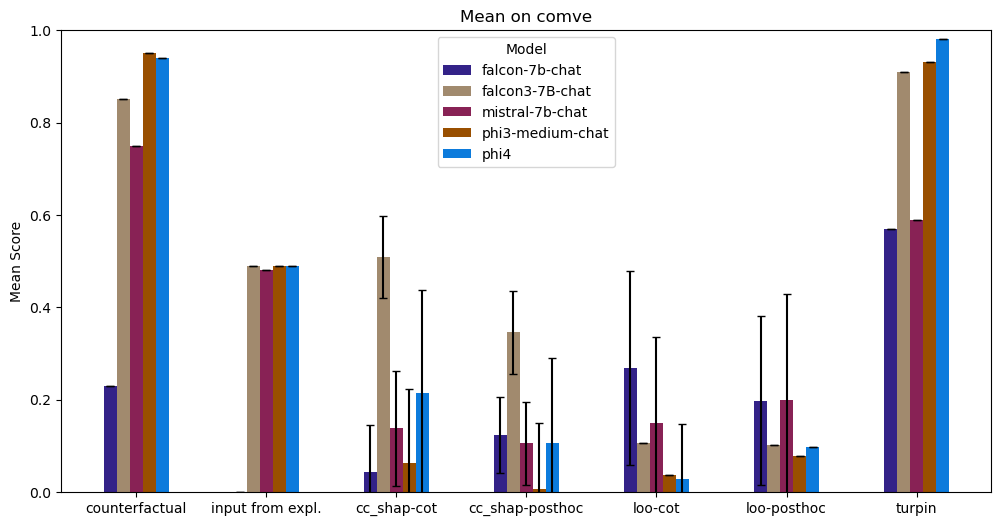

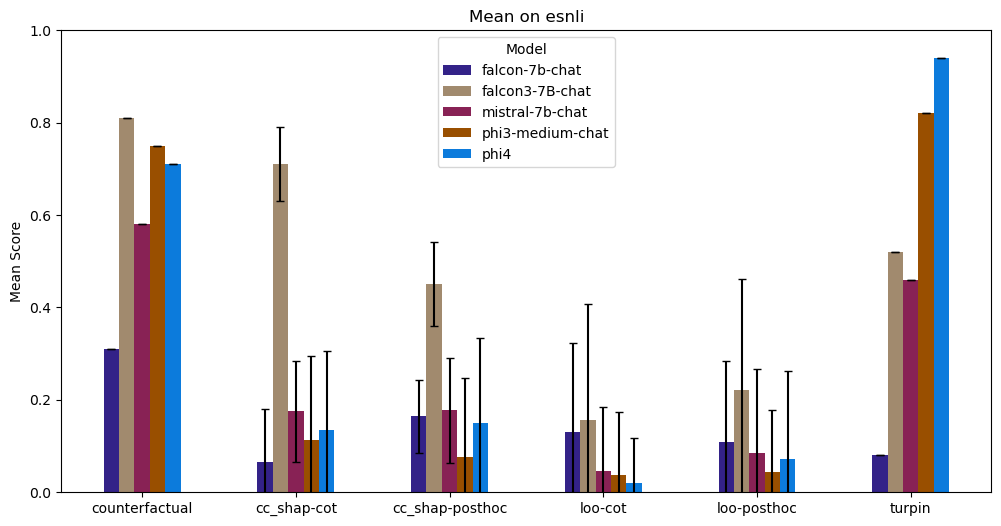

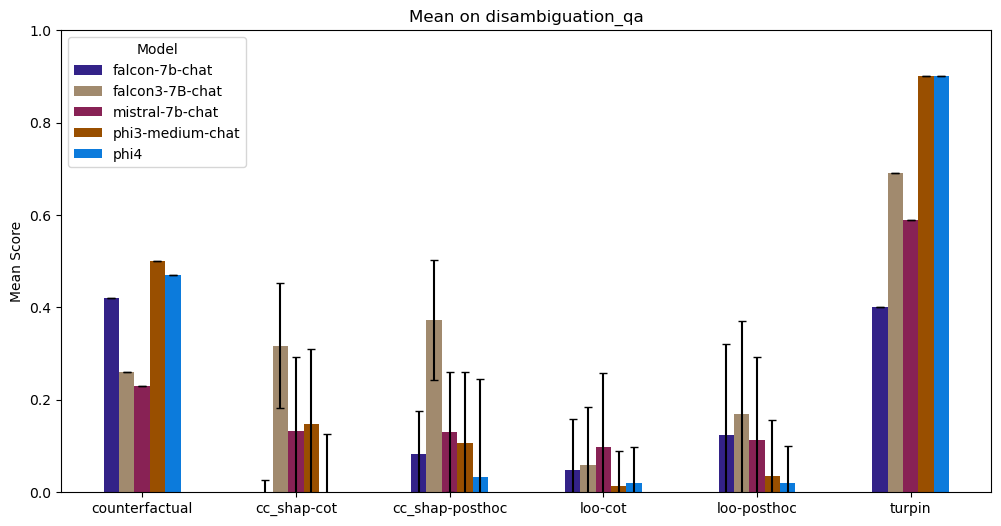

In [37]:
for dataset in ["comve", "esnli", "disambiguation_qa"]:
    frame = filter_results(
        filtered_df,
        dataset=dataset,
        model=["falcon-7b-chat", "falcon3-7B-chat", "mistral-7b-chat", "phi3-medium-chat", "phi4"],
    ).sort_values(
        by=["Model", "test"]
    )

    models = frame["Model"].unique()
    tests = frame["test"].unique()
    x = np.arange(len(tests))

    width = 0.1
    fig, ax = plt.subplots(figsize=(12, 6))

    for i, model in enumerate(models):
        filter_by_model = frame[frame["Model"] == model]
        means = filter_by_model["mean"].values
        
        stds = filter_by_model["std"].values
        stds = np.where(filter_by_model["max"] == 1, 0, stds)

        ax.bar(
            x + i * width,
            means,
            width=width,
            yerr=stds,
            ecolor="black",
            capsize=3,
            label=model,
            color=MODEL_COLORS[model]
        )

    ax.set_xticks(x + width * (len(models) // 2))
    tests = np.where(tests == 'atanasova_counterfactual', "counterfactual", tests)
    tests = np.where(tests == 'atanasova_input_from_expl', "input from expl.", tests)
    ax.set_xticklabels(tests)

    ax.set_ylabel("Mean Score")
    ax.set_ylim(0, 1.0)
    ax.legend(title="Model")
    ax.set_title(f"Mean on {dataset}")

In [38]:
for m in filtered_df["Model"].unique():
    print(m)

falcon3-7B-chat
mistral-7b-chat
phi4
falcon-7b-chat
phi3-medium-chat
llama2-7b-chat


## Time/Resources

In [53]:
time_dataframe = []
for experiment in main_experiments:
    result = ExperimentResult(load_json_file(experiment))

    args = result.args

    time_dataframe.append({
        "Model": find_arg(args, "model_name"),
        "dataset": find_arg(args, "c_task"),
        "tests": result.tests,
        "time": result.time_elapsed,
        "n_examples": len(result.examples_names()),
    })
time_dataframe = pd.DataFrame(time_dataframe)

In [80]:
filtered_time_dataframe = time_dataframe.filter(["Model", "dataset", "time"]).sort_values(by=["Model", "dataset"]).groupby("Model")["time"].sum().sort_values(ascending=False)
filtered_time_dataframe = filtered_time_dataframe.apply(lambda x: f"{x.total_seconds() // 3600:.0f}h {((x.total_seconds() % 3600) // 60):.0f}m")
filtered_time_dataframe

Model
phi4                25h 35m
llama2-7b-chat      23h 59m
falcon3-7B-chat     17h 49m
falcon-7b-chat      12h 21m
phi3-medium-chat    10h 45m
mistral-7b-chat      7h 48m
Name: time, dtype: object

In [81]:
table = create_latex_table(filtered_time_dataframe, "Time", "label")
print(table)

\begin{table}[h]
\caption{Time}
\label{label}
\begin{tabular}{l}
\toprule
time \\
\midrule
25h 35m \\
23h 59m \\
17h 49m \\
12h 21m \\
10h 45m \\
7h 48m \\
\bottomrule
\end{tabular}
\end{table}

